In [2]:
%load_ext blackcellmagic

import sleepa as sl
import h5py
#import holoviews as hv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio 
import seaborn as sns 
import numpy as np 

#hv.extension('bokeh')

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [3]:
%config InlineBackend.figure_format = 'svg'

### Load a z-stack of the reference brain 

In [4]:
ref_brain_path = '../../../prober_lab/data/Additional_mat_files/ReferenceBrain.mat'

zslice = sl.get_reference_brain_zslice(
    ref_brain_path,
    slice_ix = 30
)

### Load clustering results 

In [5]:
path_to_data = '../../../prober_lab/data/'

# Load fish 8 results 
df_clus = pd.read_csv(path_to_data+ '200501_clus_report_df_fish_10.csv')

In [6]:
df_clus.head()

,UMAP_1,UMAP_2,cluster_labels,x,y,x_norm,y_norm
0,0.967718,-1.479318,2.0,1109,1026,575,613
1,0.652395,-1.725340,14.0,1100,1025,570,612
2,-1.301726,2.689869,5.0,1092,990,564,595
3,0.566604,-1.868030,14.0,1090,1017,564,608
4,2.234789,1.650619,7.0,1088,1041,565,621


In [7]:
import glob

In [8]:
mask_files = glob.glob('../../../prober_lab/data/*.h5')

In [9]:
names = ['raphe_inf', 'raphe_sup', 'QRFP']

In [10]:
colors = ['BuGn_r', 'GnBu_d', sns.cubehelix_palette(10, reverse = True)]

In [11]:
ref_brain_path

'../../../prober_lab/data/Additional_mat_files/ReferenceBrain.mat'

In [15]:
sl.set_plotting_style()

CPU times: user 5.44 s, sys: 2.51 s, total: 7.95 s
Wall time: 5.18 s


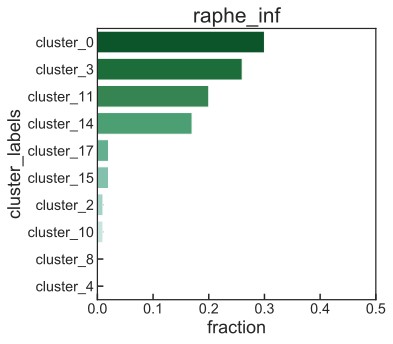

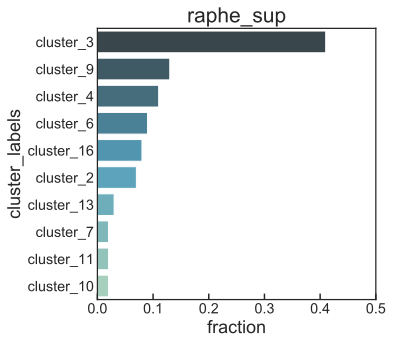

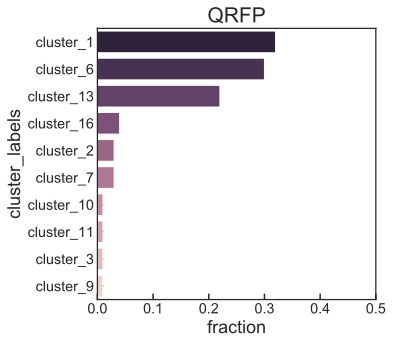

In [18]:
%%time
for fname, region, color in zip(mask_files, names, colors):
    sl.get_barplot_brain_region(
        fname, df_clus, plot_title=region, ref_brain_path=None, color_=color
    )

    plt.savefig(
        "../../../prober_lab/figs/figs_for_pres/" + region + ".png",
        dpi=240,
        bbox_inches="tight",
    )